In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

展示原图

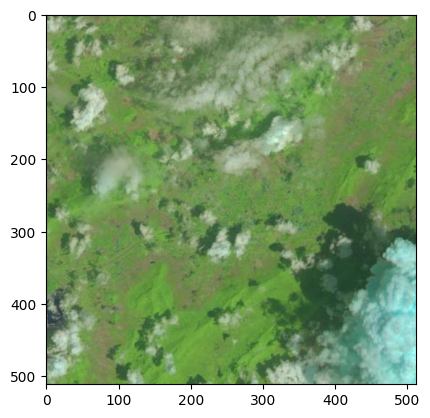

In [4]:
img_path = "img/test2.jpg"
img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

二值图像

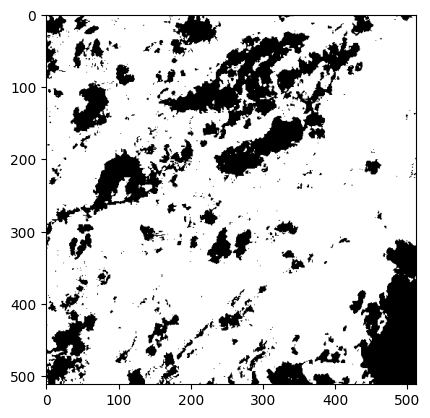

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)  # Otsu阈值处理,变成二值图像
plt.imshow(thresh, "gray")
plt.show()

分水岭算法实现

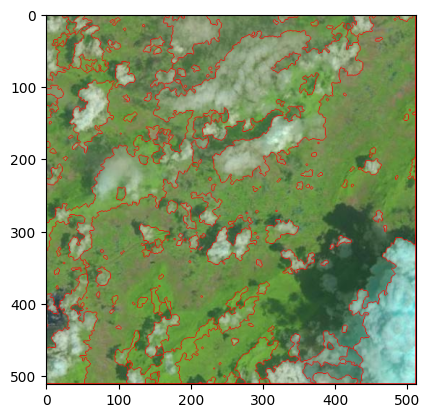

In [6]:
# 对图像进行距离变换
dist_transform = cv2.distanceTransform(thresh, cv2.DIST_L2, 5)
dist_transform_norm = cv2.normalize(dist_transform, None, 0, 1.0, cv2.NORM_MINMAX)

# 对距离变换结果进行局部极大值检测，得到一组种子点
ret, sure_fg = cv2.threshold(dist_transform, 0.1*dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(thresh, sure_fg)# 确定背景图，前景图，生成未知区域图

# 标注确定前景图
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers+1
markers[unknown==255] = 0 # 0代表未知区域
markers = cv2.watershed(img, markers) # 分水岭算法

# 显示分割结果
img[markers == -1] = [255, 0, 0] #进行标记
plt.imshow(img)
plt.show()